# KNN Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load the data

In [5]:
data=pd.read_csv("data_cleaned.csv") 
data.shape

(891, 25)

In [6]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


## Segregating independant and dependant variables

In [7]:
x=data.drop(['Survived'], axis=1) 
y=data['Survived']
x.shape, y.shape

((891, 24), (891,))

## Scaling the data using min max scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [10]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [11]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Importing the train test split function

In [14]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56,stratify=y)

## Implementing KNN Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [15]:
# Creating instance of KNN
clf=KNN(n_neighbors=5)

# Fitting the model
clf.fit(train_x,train_y)

# Predicting over the train set and calculating F1
test_predict=clf.predict(test_x)
k=f1_score(test_predict,test_y)
print('Test F1 Score  ',k)

Test F1 Score   0.6785714285714285


## Elbow  for Classifier

In [26]:
def Elbow(K):
    test_error=[]
    
    #training model for every value of k
    for i in K:
        #instance of KNN
        clf = KNN(n_neighbors=i)
        clf.fit(train_x,train_y)
        # Appending F1 scores to empty list calculated using the predictions
        tmp=clf.predict(test_x)
        tmp=f1_score(tmp,test_y)
        error=1-tmp
        test_error.append(error)
    return test_error

In [27]:
# Defining k range
k= range(6,20,2)

In [29]:
# Calling above defined function
test=Elbow(k)

Text(0.5, 1.0, 'elbow Curve for test')

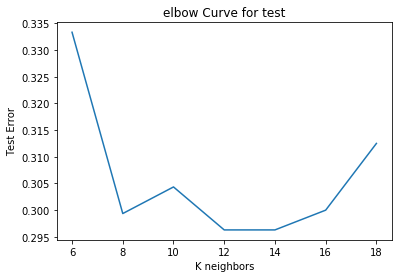

In [30]:
# plotting the curves
plt.plot(k,test)
plt.xlabel('K neighbors')
plt.ylabel('Test Error')
plt.title('elbow Curve for test')

In [31]:
# Creating instance of KNN
clf=KNN(n_neighbors=12)

# Fitting the model
clf.fit(train_x,train_y)

# Predicting over the train set and calculating F1
test_predict=clf.predict(test_x)
k=f1_score(test_predict,test_y)
print('Test F1 Score  ',k)

Test F1 Score   0.7037037037037037


# KNN Regression

In [39]:
data=pd.read_csv("train_cleaned.csv") 

In [40]:
data.shape

(8523, 46)